In [1]:
import pandas as pd
import numpy as np
import methylcheck
import methylize
import matplotlib.pyplot as plt

 # load and organize data from GSE156984
 
ref source: I pasted table 2 from paper into a tab-separated CSV file and load here to compare p-values for selected probes.

In [3]:

ref = pd.read_csv('/Users/mmaxmeister/methylize/data/GSE156984/GSE156984_table2.csv', sep='\t')
meta = pd.read_csv('/Volumes/LEGX/GEO/GSE156984/GSE156984_GPL21145_samplesheet.csv')
print("table 1 treatment/control N")
print(meta['source'].value_counts())

# df has 381 columns, with "Detection_Pval","Methylated_Signal", and "Unmethylated_Signal" for each sample.
# ---using methylcheck 
# THIS SHOULD WORK, but latest version loses one sample, so doing it manually.
# df = methylcheck.read_geo('/Volumes/LEGX/GEO/GSE156984/GSE156984_STG_Matrix_signal_intensities.txt')

raw = pd.read_csv('/Volumes/LEGX/GEO/GSE156984/GSE156984_STG_Matrix_processed.txt', sep='\t')
usecols = [col for col in raw.columns if 'Detection' not in col]
betas = raw[usecols]

sample_names = [f"{row.split('_')[0]}_{row.split('_')[1]}" for row in raw.columns][::3] #<--- keep every 3rd item 
# confirmed: using Counter() that sample_names is complete.
# a lookup dict of each Sentrix_ID : disease/brain area code.
treatment = {row['description']:row['source'] for idx,row in meta[['description', 'source']].iterrows()}

table 1 treatment/control N
AD, STG    67
AD, IFG    60
ND, STG    60
ND, IFG    57
Name: source, dtype: int64


In [4]:
# sample names are repeated 3 times per sample in original data and not extracted correctly with methylcheck
#raw = pd.read_csv('/Volumes/LEGX/GEO/GSE156984/GSE156984_STG_Matrix_signal_intensities.txt', sep='\t')
#pvals = raw[raw.columns[::3]]
#meth = raw[raw.columns[1::3]]
#unmeth = raw[raw.columns[2::3]]
#print( len(pvals.columns), len(meth.columns), len(unmeth.columns), len(sample_names) )

def calculate_m_value(methylated_noob, unmethylated_noob, offset=0):
    """ the log(base 2) (1+meth / 1+unmeth) intensities (with a min clip intensity of 1 to avoid divide-by-zero-errors, like sesame)"""
    methylated = np.clip(methylated_noob, 1, None) + offset
    unmethylated = np.clip(unmethylated_noob, 1, None) + offset

    with np.errstate(all='raise'):
        intensity_ratio = np.true_divide(methylated, unmethylated)
    return np.log2(intensity_ratio)

def apply_matrix_m(meth, unmeth, sample_names):
    m_values = {}
    for i in range(len(meth.columns)):
        m_values[sample_names[i]] = calculate_m_value(meth.iloc[:, i], unmeth.iloc[:, i])
    return pd.DataFrame(data=m_values)

#m_values = apply_matrix_m(meth,unmeth,sample_names)

In [6]:
#m_values
betas

,201502820002_R04C01,201502820002_R05C01,201502820002_R08C01,201502820005_R02C01,201502820005_R03C01,201502820005_R04C01,201502820005_R06C01,201502820005_R07C01,201502820005_R08C01,201502820006_R02C01,...,201502840059_R08C01,201502840060_R06C01,201502860007_R01C01,201502860007_R02C01,201502860007_R04C01,201502860007_R07C01,201502860007_R08C01,201502860019_R02C01,201502860019_R06C01,201502860019_R07C01
cg21870274,0.663485,0.632571,0.693711,0.705675,0.611343,0.592399,0.642301,0.663888,0.618357,0.655164,...,0.645582,0.602932,0.649775,0.625936,0.615915,0.639322,0.596279,0.591145,0.637414,0.629546
cg16535257,0.200014,0.276128,0.364923,0.154131,0.240218,0.317914,0.198716,0.175780,0.165380,0.285081,...,0.144168,0.211531,0.298163,0.227543,0.205124,0.314339,0.277782,0.263967,0.222433,0.206509
cg00168193,0.814826,0.806482,0.786298,0.830421,0.829881,0.841762,0.826537,0.821227,0.820951,0.836109,...,0.781481,0.781718,0.831407,0.877509,0.872631,0.872362,0.864319,0.835307,0.852447,0.839986
cg06325811,0.527333,0.593228,0.550013,0.476810,0.512239,0.556793,0.497157,0.494316,0.535190,0.524339,...,0.565456,0.528620,0.643831,0.488614,0.459516,0.552132,0.537944,0.546439,0.528679,0.551061
cg08258224,0.661088,0.616321,0.722258,0.781583,0.655499,0.620756,0.627721,0.698864,0.730781,0.662969,...,0.704438,0.715234,0.650500,0.648713,0.699222,0.580118,0.621653,0.640333,0.616274,0.618039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg13801850,0.837742,0.831838,0.794702,0.838327,0.840630,0.834524,0.831754,0.856563,0.843070,0.848630,...,0.828311,0.837723,0.835813,0.846109,0.843487,0.832088,0.852279,0.869722,0.840296,0.806611
cg08423507,0.897368,0.917923,0.895852,0.926769,0.926765,0.903571,0.941252,0.911009,0.913943,0.915864,...,0.919032,0.921661,0.873608,0.880373,0.871023,0.869440,0.872496,0.914099,0.928053,0.918552
cg24129471,0.815034,0.823146,0.844552,0.833819,0.820450,0.855212,0.825338,0.847137,0.856340,0.838836,...,0.842966,0.830245,0.863918,0.835836,0.886743,0.880073,0.892053,0.877445,0.843894,0.859084
cg09007244,0.028141,0.028194,0.045750,0.031185,0.036343,0.028465,0.032006,0.027224,0.039415,0.032030,...,0.040085,0.037799,0.038652,0.037928,0.040011,0.042156,0.034116,0.038833,0.035805,0.038448


# calculate DMP and compare with table 2

In [7]:
probes = list(ref.Name)
from collections import Counter
Counter(treatment.values())
STG_pheno = [v for k,v in treatment.items() if v in ('ND, STG', 'AD, STG')]
STG_samples = [k for k,v in treatment.items() if v in ('ND, STG', 'AD, STG')]
#subset = m_values[STG_samples].loc[probes]
subset = betas[STG_samples].loc[probes]
subset.name = 'STG_Alzheimers'
subset.index.name = 'IlmnID'
print(len(probes), len(STG_pheno), subset.shape)
nodupes = np.unique( subset.index.values, return_index = True )[1]
subset = subset.iloc[nodupes]

45 127 (45, 127)


In [8]:
def plotter(result, title):
    ref = pd.read_csv('/Users/mmaxmeister/methylize/data/GSE156984/GSE156984_table2.csv', sep='\t')
    # gotcha!! the table minus (-) signs are unicode symbols
    ref = ref.replace({'\U00002013': '-','−':'-'}, regex=True)
    ref1 = ref[['Name','STG_beta','STG_pvalue']].set_index('Name').drop_duplicates()
    ref1 = ref1.astype('float')
    ref1.index.name = 'IlmnID'
    test1 = result[ result.index.isin(ref.Name) ]
    test1.index.name = 'IlmnID'
    test1.shape, ref1.shape
    combined = test1.join(ref1)
    combined['difference'] = combined.PValue - combined.STG_pvalue
    combined = combined.sort_values('difference')
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure
    figure(figsize=(12,6))
    plt.bar(combined.index, combined.difference)
    plt.xticks(rotation=90)
    plt.ylim(-1,1)
    plt.title(solver, fontsize=16)
    plt.show()

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (127, 22)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (AD, STG) was assigned to 0 and (ND, STG) was assigned to 1.


logit_DMP


Probes:   0%|          | 0/22 [00:00<?, ?it/s]

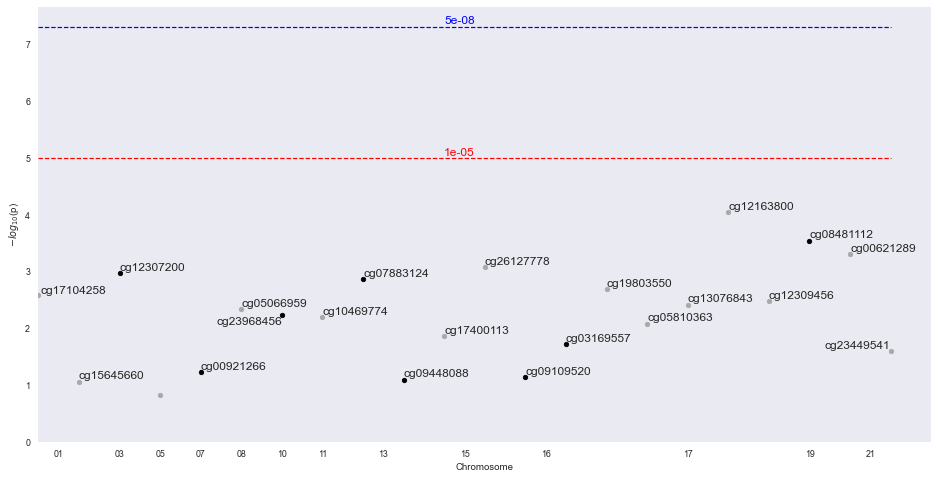

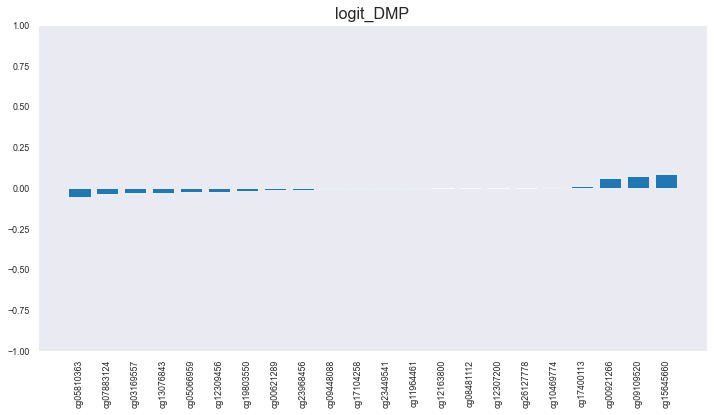

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (127, 22)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (AD, STG) was assigned to 0 and (ND, STG) was assigned to 1.


statsmodels_GLM


Probes:   0%|          | 0/22 [00:00<?, ?it/s]

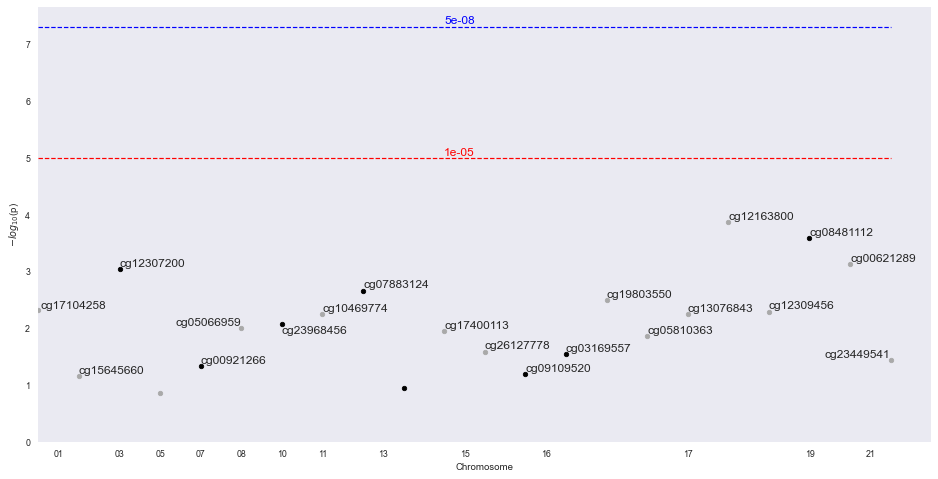

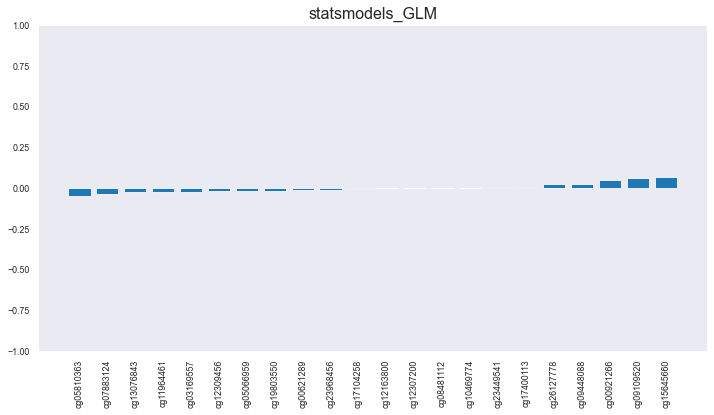

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (127, 22)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (AD, STG) was assigned to 0 and (ND, STG) was assigned to 1.


scratch_logit


Probes:   0%|          | 0/22 [00:00<?, ?it/s]

Error: No significant probes (FDR line omitted from plot)


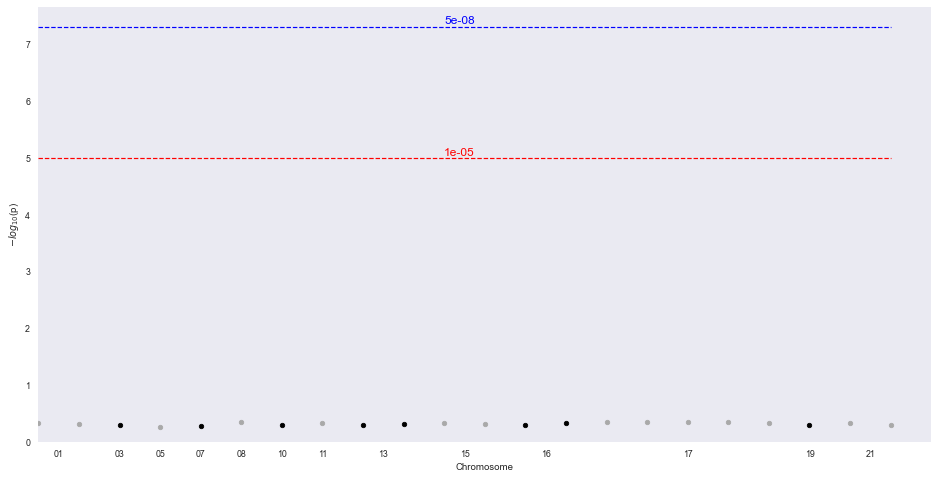

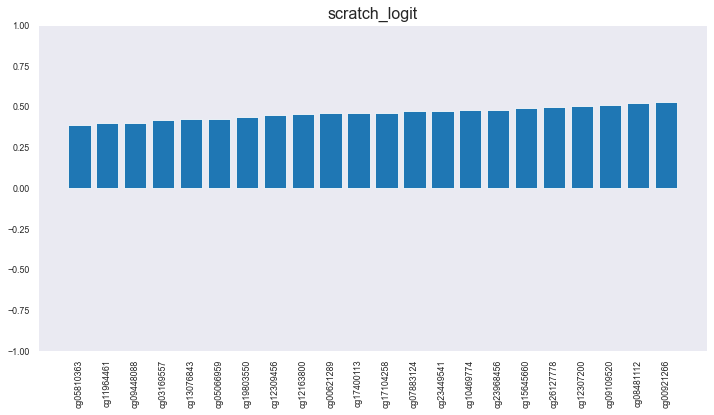

In [9]:
for solver in ['logit_DMP', 'statsmodels_GLM', 'scratch_logit']:
    print(solver)
    result = methylize.diff_meth_pos(subset, STG_pheno, 'logistic', solver=solver)
    methylize.manhattan_plot(result, 'epic')
    plotter(result, title=solver)

# comparing to statsmodels logistic regression methods in methylize

In [ ]:
def test2(what='disease status', debug=False):
    import methylize as m
    import pandas as pd
    from pathlib import Path
    path = Path('/Volumes/LEGX/GEO/GSE85566/GPL13534/')
    beta = pd.read_pickle(Path(path,'beta_values.pkl'))
    pheno = pd.read_pickle(Path(path,'GSE85566_GPL13534_meta_data.pkl'))['disease status'] # 'gender' or 'disease status'
    sample = beta.sample(2000)
    result1 = m.diff_meth_pos(sample, pheno, 'logistic')
    m.manhattan_plot(result1, '450k', save=True, filename='testlogit.png')
    result2 = m.diff_meth_pos(sample, pheno, 'logistic', solver='statsmodels_GLM')
    m.manhattan_plot(result2, '450k', save=True, filename='testglm.png')
    return result1, result2
r1, r2 = test2()

In [ ]:
def compare_col(r1, r2, colname):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    plt.scatter(r1[colname], r2[colname])
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.3, zorder=0)
    plt.title(colname, fontsize=18)
    plt.show()   
compare_col(r1, r2, 'PValue')
compare_col(r1, r2, 'FDR_QValue')
compare_col(r1, r2, 'fold_change')
compare_col(r1, r2, 'Coefficient')